<a href="https://colab.research.google.com/github/micattia/Capstone/blob/master/05_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#loading required libraries 
#==========================
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import plotly.plotly as py
import plotly.figure_factory as ff
%matplotlib inline
pyplot.style.use('ggplot')

In [0]:
#load Apple data 
linkAP1 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/AppleFinalData.csv'
dfAPPL = pd.read_csv(linkAP1)
linkAP2 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/AppleNewsStock.csv'
dfAPPLnews = pd.read_csv(linkAP2)

#load Microsoft data
linkMS1 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/MicrosoftFinalData.csv'
dfMS = pd.read_csv(linkMS1)
linkMS2 = 'https://raw.githubusercontent.com/micattia/Capstone_Data/master/MicrosoftNewsStock.csv'
dfMSnews = pd.read_csv(linkMS2)

# Changing Some column names for the Microsoft main data frame to:
# 1- removed the space from the Adj Close column, so that it would not give errors with coding
# 2- standarised all columns to start with caps lock.

dfMS = dfMS.rename(index=str, columns={"Adj Close": "Adj_Close", "compound": "Compound", "neg": "Neg", "neu": "Neu", "pos": "Pos"})

# Changing Some column names for the Apple main data frame to:
# 1- removed the space from the Adj Close column, so that it would not give errors with coding
# 2- standarised all columns to start with caps lock.

dfAPPL = dfAPPL.rename(index=str, columns={"Adj Close": "Adj_Close", "compound": "Compound", "neg": "Neg", "neu": "Neu", "pos": "Pos"})

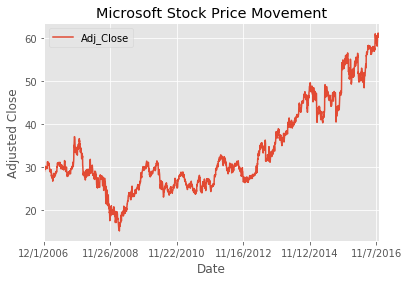

In [3]:
# CREATING A SUBSET OF MICROSOFT DATASET WITH ONLY TWO COLUMNS THE DATE AND ADJ_CLOSE
# THE REASON FOR CREATING THIS DATA SET IS TO PLOT THE STOCK PRICE MOVEMENT OVER TIME 
# TO SEE HOW THE PRICE CHANGE IS GOING THROUGH THE TEN YEARS RANGE OF THE DATASET
# The Graph shows the effect of the financial Crisys in 2008 on the Microsoft Stock 

# creating the dataframe with date column as the index
dfMSind = pd.read_csv(linkMS1, index_col="Date",usecols=["Date","Adj Close"])
# renaming the adj close column name to remove the space
dfMSind = dfMSind.rename(index=str,columns={"Adj Close": "Adj_Close"})
#dfMSind.head()
# creating the plot object with title and form parameters, then giving the X and Y labels
ax = dfMSind.plot(title = "Microsoft Stock Price Movement",fontsize = 10)
ax.set_xlabel("Date")
ax.set_ylabel("Adjusted Close")
pyplot.show()

# code sample for Slicing the Dataset
#ls = dfMS[[str('Date'),'Close','Open']]
#ls = dfMSind[['Date','Adj_Close']]

In [82]:
# THE STOCK PRICE MOVEMENT WAS VERY IMPORTANT AS IT SHOWS 
# HOW FAR THE STOCK PROCE REACHED AWAY FROM THE MEAN STARTING ON WHAT DATE
# AND THAT WOULD HEALP TO REDUCE THE DATA BY SUBSETING THE DATA STARTING A SPECIFIC DATE 
# THIS IS A PART OF REMOVING THE OUTLIERS TRYING TO GET MOR NORMALIZED DATASET
# THE PRICE MOVEMENT GRAPH SHOWS THAT BEST PERIOD IS BETEEN NOV 2008 AND NOV 12 2014

# first getting the index of NOV 11 2014
ar1 = np.where(dfMS["Date"] == '11/12/2013')
ar2 = np.where(dfMS["Date"] == '11/26/2008')
print(ar1)
print(ar2)

(array([1748]),)
(array([500]),)


In [83]:
# second: slicing the dataset From NOV 2008 till NOV 2014
lsMS = dfMS[500:1748]
lsMS.head()

,Date,Open,High,Low,Close,Adj_Close,Compound,Neg,Neu,Pos
500,11/26/2008,19.73,20.68,19.73,20.49,20.49,0.0000,0.0,0.000,0.000
501,11/28/2008,20.23,20.31,20.02,20.22,20.22,0.0000,0.0,0.000,0.000
502,12/1/2008,19.88,19.95,18.60,18.61,18.61,0.0000,0.0,0.000,0.000
503,12/2/2008,18.99,19.31,18.56,19.15,19.15,0.0000,0.0,0.000,0.000
504,12/3/2008,18.65,19.90,18.60,19.87,19.87,0.6369,0.0,0.828,0.172


In [84]:
# Check the number of Rows in the Microsoft dataset after after subsetting for 6 years only instead of 10 
lsMS.shape

(1248, 10)

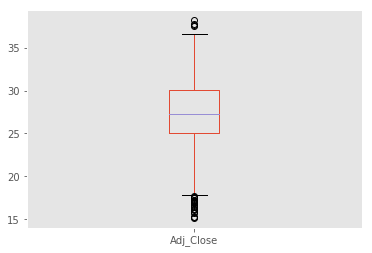

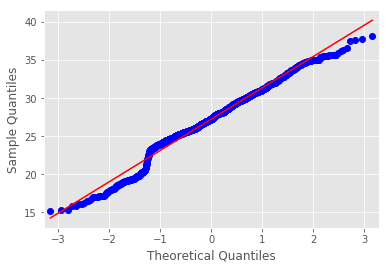

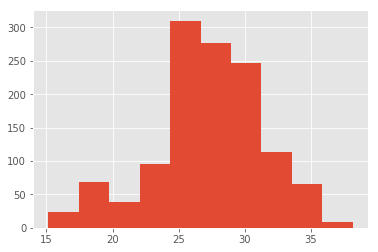

In [85]:
#Re-Test Normality again for Microsoft data set columns [Open]

# Box Plot
lsMS.boxplot( column =['Adj_Close'], grid = False) 
# q-q plot
qqplot(lsMS.Adj_Close, line='s')
pyplot.show()
# histogram plot
pyplot.hist(lsMS.Adj_Close)
pyplot.show()

In [0]:
# THE ABOVE SHOWS THAT AFTER SUBSETING THE DATA WE GOT A MORE NORMALISED DATA SET

In [0]:
# RE-CHECKING THE OUTLIERS AFTER SUBSETTING THE DATA
# Creating function to calculate the z-Score and get outliers

def detect_outlier(data_1):
    outliers= []
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    #df_outliers.append(outliers)
    return outliers

In [87]:
# Reuning the function for the columns that had outliers to see how subseting the dataset reduced the outliers

outlier_datapoints = detect_outlier(lsMS.Pos)
x = len(outlier_datapoints)
k = 'In Microdoft Dataset The number of Outliers for the Pos Column is: ' + repr(x)
print(k)

outlier_datapoints1 = detect_outlier(lsMS.Neg)
a = len(outlier_datapoints1)
b = 'In Microdoft Dataset The number of Outliers for the Neg Column is: ' + repr(a)
print(b)

In Microdoft Dataset The number of Outliers for the Pos Column is: 14
In Microdoft Dataset The number of Outliers for the Neg Column is: 28


In [0]:
# TEST SHOWS THAT SUBSETTING THE DATA ENHANCED THE NORMALITY AND REDUCED THE NUMBER OF OUTLIERS

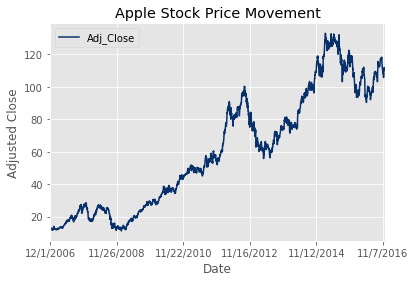

In [72]:
# CREATING A SUBSET OF APPLE DATASET WITH ONLY TWO COLUMNS THE DATE AND ADJ_CLOSE
# THE REASON FOR CREATING THIS DATA SET IS TO PLOT THE STOCK PRICE MOVEMENT OVER TIME 
# TO SEE HOW THE PRICE CHANGE IS GOING THROUGH THE TEN YEARS RANGE OF THE DATASET

# creating the dataframe with date column as the index
dfAPPLind = pd.read_csv(linkAP1, index_col="Date",usecols=["Date","Adj Close"])
# renaming the adj close column name to remove the space
dfAPPLind = dfAPPLind.rename(index=str,columns={"Adj Close": "Adj_Close"})
#dfMSind.head()
# creating the plot object with title and form parameters, then giving the X and Y labels
ax = dfAPPLind.plot(title = "Apple Stock Price Movement",fontsize = 10, colormap = "Blues_r")
ax.set_xlabel("Date")
ax.set_ylabel("Adjusted Close")
pyplot.show()

In [107]:
# Doing the same for Apple Data set
# THE STOCK PRICE MOVEMENT WAS VERY IMPORTANT AS IT SHOWS 
# HOW FAR THE STOCK PROCE REACHED AWAY FROM THE MEAN STARTING ON WHAT DATE
# AND THAT WOULD HEALP TO REDUCE THE DATA BY SUBSETING THE DATA STARTING A SPECIFIC DATE 
# THIS IS A PART OF REMOVING THE OUTLIERS TRYING TO GET MOR NORMALIZED DATASET
# THE PRICE MOVEMENT GRAPH SHOWS THAT BEST PERIOD IS BETEEN NOV 2008 AND NOV 12 2014

# first getting the index of the start date and end date
ar1 = np.where(dfAPPL["Date"] == '11/12/2013')
ar2 = np.where(dfAPPL["Date"] == '11/26/2008')
print(ar1)
print(ar2)

(array([1748]),)
(array([500]),)


In [108]:
# second: slicing the dataset From NOV 2008 till NOV 2014
lsAPPL = dfAPPL[500:1748]
lsAPPL.head()

,Date,Open,High,Low,Close,Adj_Close,Compound,Neg,Neu,Pos
500,11/26/2008,12.8457,13.6071,12.8357,95.00,13.5714,0.9668,0.041,0.843,0.116
501,11/28/2008,13.5286,13.5371,13.1229,92.67,13.2386,0.9890,0.028,0.773,0.199
502,12/1/2008,13.0429,13.1814,12.7029,88.93,12.7043,0.9839,0.046,0.818,0.137
503,12/2/2008,12.8614,13.2357,12.3571,92.47,13.2100,0.8132,0.103,0.765,0.132
504,12/3/2008,12.7714,13.7471,12.6857,95.90,13.7000,0.0000,0.000,0.000,0.000


In [109]:
# Check the number of Rows in the Microsoft dataset after after subsetting for 6 years only instead of 10 
lsAPPL.shape

(1248, 10)

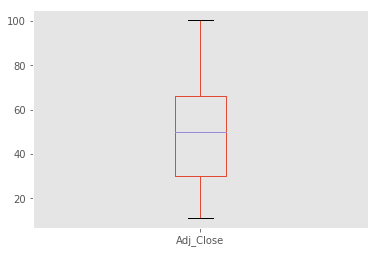

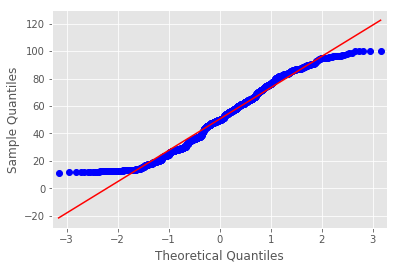

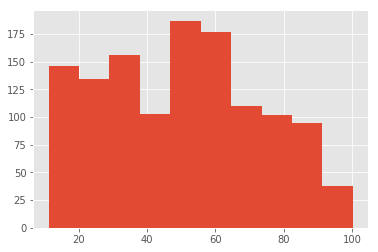

In [110]:
#Re-Test Normality again for Microsoft data set columns [Open]

# Box Plot
lsAPPL.boxplot( column =['Adj_Close'], grid = False) 
# q-q plot
qqplot(lsAPPL.Adj_Close, line='s')
pyplot.show()
# histogram plot
pyplot.hist(lsAPPL.Adj_Close)
pyplot.show()

In [111]:
# Reuning the function for the columns that had outliers to see how subseting the dataset reduced the outliers

outlier_datapoints = detect_outlier(lsAPPL.Pos)
x = len(outlier_datapoints)
k = 'In APPLE Dataset The number of Outliers for the Pos Column is: ' + repr(x)
print(k)

outlier_datapoints = detect_outlier(lsAPPL.Neu)
m = len(outlier_datapoints)
n = 'In APPLE Dataset The number of Outliers for the Neutral Column is: ' + repr(m)
print(n)

outlier_datapoints1 = detect_outlier(lsAPPL.Neg)
a = len(outlier_datapoints1)
b = 'In APPLE Dataset The number of Outliers for the Neg Column is: ' + repr(a)
print(b)

In APPLE Dataset The number of Outliers for the Pos Column is: 3
In APPLE Dataset The number of Outliers for the Neutral Column is: 91
In APPLE Dataset The number of Outliers for the Neg Column is: 14


In [0]:
# TEST SHOWS THAT SUBSETTING THE DATA ENHANCED THE NORMALITY AND REDUCED THE NUMBER OF OUTLIERS